## AirBnB Listing Analysis
Analyze AirBnB listings in Paris to determine the impact of recent regulations

#### Airbnb Listings & Reviews
Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

NOTE: Prices are in local currency

#### Recommended Analysis

 - Can you spot any major differences in the Airbnb market between cities?

 - Which attributes have the biggest influence in price?

 - Are you able to identify any trends or seasonality in the review data?

 - Which city offers a better value for travel?

In [39]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
# AirBnB listing Data
airbnb = pd.read_csv('E:\Maven_Analytics_Challenges\Projects\AirBnB_Listing_Analysis\Dataset\Listings.csv', 
                     encoding = 'ISO-8859-1', low_memory=False, parse_dates=['host_since'])

In [41]:
# dimensions of data
airbnb.shape

(279712, 33)

In [42]:
airbnb.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [43]:
# datatypes
airbnb.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

In [44]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

### Objective 1: Profile & QA the data

Your first objective is to read in the AirBnB listings data, calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings.

#### Task

 - Import/Open the Listings.csv file
 - Cast any date columns as a datetime format
 - Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
 - QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [45]:
# filter down city to "Paris" keep only specified columns
# method - 1
paris_listing = airbnb[airbnb['city']=='Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

# method - 2
paris_listing = airbnb.query("city == 'Paris'").loc[:,['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [46]:
# check new dataframe
paris_listing.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [47]:
# dimensions
paris_listing.shape

(64690, 5)

In [48]:
# descriptive statistics
paris_listing.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,64690.0,3.037997,1.588766,0.0,2.0,2.0,4.0,16.0
price,64690.0,113.096445,214.433668,0.0,59.0,80.0,120.0,12000.0


In [49]:
# check for null/missing values
paris_listing.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [50]:
# duplicate records
paris_listing.duplicated().sum()

2113

In [51]:
# drop duplicates
paris_listing.drop_duplicates(inplace=True)

In [52]:
# instances where accommodates == 0 with price == 0
paris_listing.query("accommodates == 0 and price == 0").count()

host_since       53
neighbourhood    53
city             53
accommodates     53
price            53
dtype: int64

In [54]:
# instances where accommodates == 0 and price == 0
paris_listing.query("accommodates == 0" and "price == 0").count()

host_since       61
neighbourhood    61
city             61
accommodates     61
price            61
dtype: int64

As you can see that a very small fraction of our dataset has some inconsistent values which could be a data entry error or incomplete information as nobody will rent their airbnb for free. Since, it is a very small fraction as compared to the whole dataset, it won't affect our analysis that much.

In [53]:
# dimensions of the new dataframe
paris_listing.shape

(62577, 5)

In [55]:
# create a column host_year
paris_listing['host_year'] = paris_listing['host_since'].dt.year.convert_dtypes('int')

#### Objective 2: Prepare the data for visualization
Your second objective is to produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

#### Task 1: Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [56]:
paris_listing_neighbourhood = paris_listing.groupby('neighbourhood').agg({'price':'mean'}).sort_values(
    by='price', ascending=True).reset_index()
paris_listing_neighbourhood['price'] = paris_listing_neighbourhood['price'].round(2)
paris_listing_neighbourhood

,neighbourhood,price
0,Menilmontant,75.45
1,Buttes-Chaumont,80.91
2,Buttes-Montmartre,87.55
3,Reuilly,89.46
4,Popincourt,90.81
5,Gobelins,98.44
6,Observatoire,102.13
7,Batignolles-Monceau,102.66
8,Enclos-St-Laurent,103.07
9,Vaugirard,106.85


#### Task 2 - Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [57]:
paris_listing_accomodations = paris_listing[paris_listing['neighbourhood']=='Elysee'].groupby('accommodates').agg({'price':'mean'}).sort_values(
    by='price', ascending=True).reset_index()
paris_listing_accomodations['price'] = paris_listing_accomodations['price'].round(2)
paris_listing_accomodations

,accommodates,price
0,0,0.00
1,1,80.47
2,3,153.34
3,2,157.24
4,4,213.65
5,5,330.09
6,6,357.68
7,8,395.50
8,7,411.54
9,9,440.27


#### Task 3: Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [58]:
paris_listings_over_time = paris_listing.groupby('host_year').agg({'host_since':'count', 'price':'mean'}).sort_values(
    by='host_year', ascending=True).reset_index()
paris_listings_over_time['price'] = paris_listings_over_time['price'].round(2)
paris_listings_over_time

,host_year,host_since,price
0,2008,4,77.75
1,2009,104,159.97
2,2010,412,125.15
3,2011,1318,125.11
4,2012,4487,111.95
5,2013,7926,106.86
6,2014,10614,100.50
7,2015,11747,104.19
8,2016,8601,112.03
9,2017,4422,108.90


#### Objective 3 - Visualize the data and summarize findings

Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

#### Task 1: Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

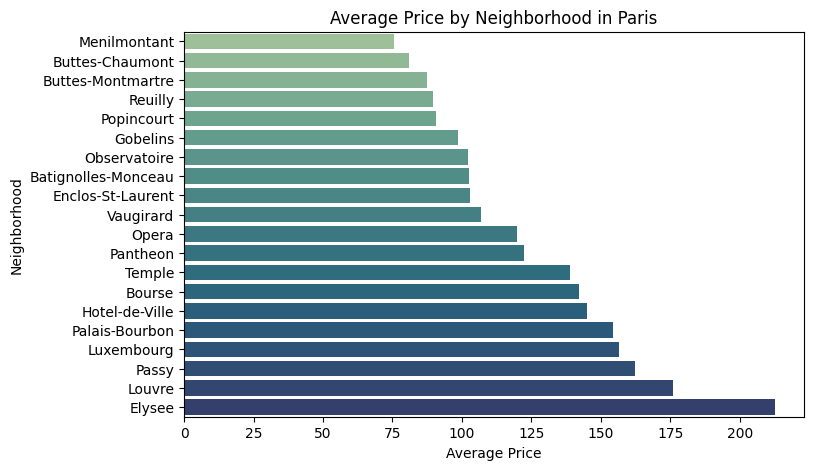

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(data=paris_listing_neighbourhood, x='price', y='neighbourhood', estimator=np.mean, ci=None, dodge=False,
            palette='crest')
plt.title('Average Price by Neighborhood in Paris')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

#### Task 2: Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

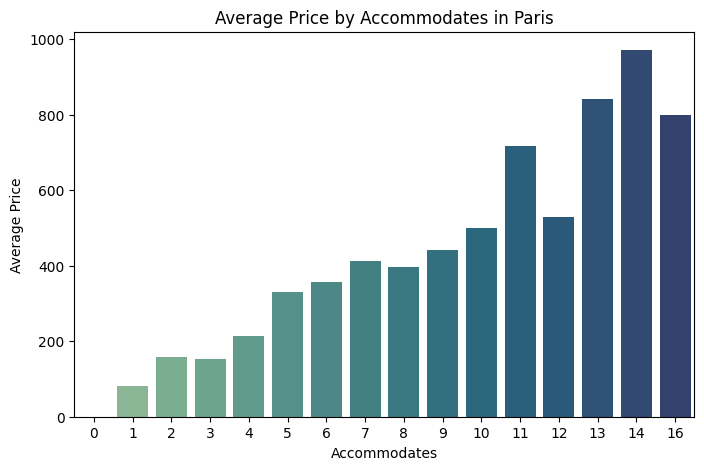

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(data=paris_listing_accomodations, x='accommodates', y='price', estimator=np.mean, ci=None, dodge=False,
            palette='crest')
plt.title('Average Price by Accommodates in Paris')
plt.xlabel('Accommodates')
plt.ylabel('Average Price')
plt.show()

#### Task 3: Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

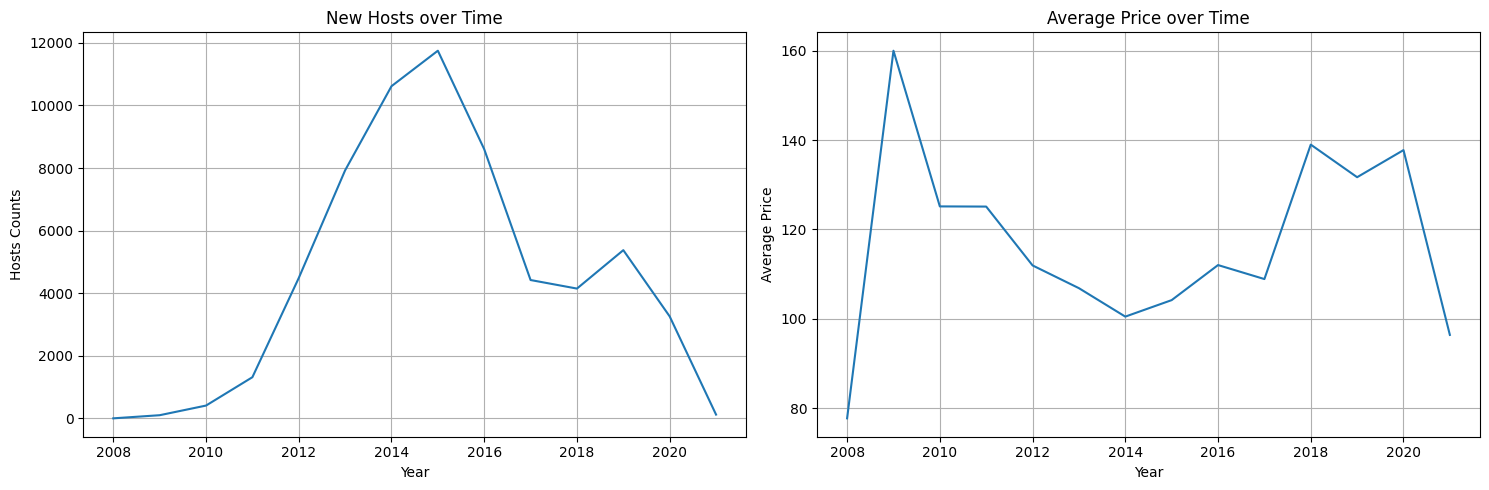

In [61]:
plt.figure(figsize=(15,5))

# New hosts over time
ax1 = plt.subplot2grid((1,2),(0,0))
sns.lineplot(data=paris_listings_over_time, x='host_year', y='host_since', palette='crest', ax=ax1)
plt.title("New Hosts over Time")
plt.xlabel("Year")
plt.ylabel("Hosts Counts")
plt.grid(True)


# Average Price over time
ax2 = plt.subplot2grid((1,2),(0,1))
sns.lineplot(data=paris_listings_over_time, x='host_year', y='price', palette='crest', ax=ax2)
plt.title("Average Price over Time")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Bonus Task: Create a dual axis line chart to show both new hosts and average price over time

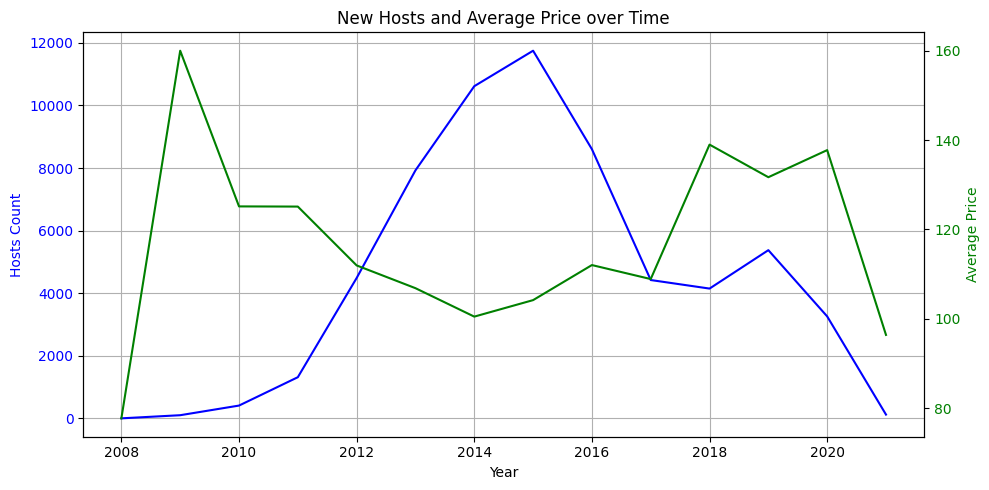

In [63]:
# Create a figure
plt.figure(figsize=(10, 5))

# Create the first axis for "New Hosts over Time"
ax1 = plt.gca()  # Get the current axes (first plot)
sns.lineplot(data=paris_listings_over_time, x='host_year', y='host_since', color='b', ax=ax1)
ax1.set_title("New Hosts and Average Price over Time")
ax1.set_xlabel("Year")
ax1.set_ylabel("Hosts Count", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create the second axis for "Average Price over Time"
ax2 = ax1.twinx()  # Create a twin axis sharing the same x-axis
sns.lineplot(data=paris_listings_over_time, x='host_year', y='price', color='g', ax=ax2)
ax2.set_ylabel("Average Price", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### As we can see from above line charts that the 2015 regulations lead to fewer new hosts but higher prices.